<a href="https://colab.research.google.com/github/Saisirileela123/HandWritten-digit-prediction/blob/main/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The digits dataset consists of 8x8 pixel images of digits.The images attribute of the dataset stored 8x8 arrays of grayscale values for each image.We will use these arrays to visualize the first 4 images.The target attribute of the dataset stores the digit each image represents

# **HandWritten Digit Prediction-Classificaion Analysis:**

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

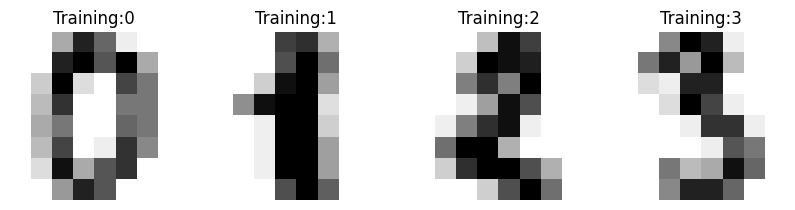

In [ ]:
from sklearn.datasets import load_digits
df=load_digits()
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i" %label)

# **Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([2, 4, 5, 9, 9, 8, 6, 9, 2, 5, 7, 3, 9, 3, 3, 5, 1, 9, 7, 9, 3, 6,
       2, 1, 9, 2, 5, 1, 7, 3, 2, 9, 4, 9, 1, 0, 7, 1, 8, 2, 4, 8, 8, 2,
       3, 6, 7, 8, 3, 5, 9, 2, 2, 3, 7, 2, 9, 3, 4, 4, 8, 1, 4, 3, 3, 9,
       4, 9, 6, 1, 9, 0, 7, 9, 5, 1, 3, 2, 7, 6, 9, 3, 1, 0, 7, 7, 1, 5,
       0, 3, 0, 1, 1, 8, 6, 5, 3, 2, 5, 8, 7, 5, 9, 7, 5, 7, 9, 2, 6, 0,
       4, 5, 5, 8, 1, 7, 2, 4, 5, 5, 1, 0, 6, 2, 1, 4, 3, 8, 0, 5, 9, 7,
       8, 6, 3, 5, 4, 0, 6, 9, 6, 8, 0, 4, 5, 0, 1, 5, 3, 9, 5, 0, 5, 8,
       9, 1, 2, 5, 1, 2, 2, 2, 5, 1, 2, 2, 2, 5, 1, 1, 3, 6, 3, 3, 4, 1,
       4, 5, 8, 1, 1, 4, 3, 4, 5, 3, 9, 1, 4, 3, 4, 4, 7, 9, 3, 6, 6, 9,
       7, 1, 5, 3, 7, 4, 7, 5, 7, 0, 5, 7, 5, 7, 4, 3, 9, 2, 1, 7, 6, 0,
       1, 6, 0, 2, 4, 9, 7, 7, 0, 4, 1, 2, 9, 1, 4, 5, 4, 9, 7, 1, 5, 4,
       4, 8, 5, 2, 1, 0, 0, 6, 6, 7, 0, 3, 4, 6, 5, 5, 6, 8, 4, 8, 0, 4,
       3, 2, 1, 0, 0, 4, 0, 1, 9, 0, 3, 0, 3, 1, 8, 3, 8, 8, 4, 1, 2, 8,
       3, 2, 0, 3, 8, 0, 6, 4, 5, 7, 3, 4, 7, 1, 5,

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      1.00      0.97        57
           2       0.98      1.00      0.99        49
           3       1.00      1.00      1.00        61
           4       1.00      1.00      1.00        54
           5       0.94      0.98      0.96        65
           6       1.00      0.94      0.97        48
           7       1.00      0.98      0.99        54
           8       0.90      0.90      0.90        39
           9       1.00      0.93      0.97        60

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.98      0.98      0.98       540

